# ISLR Sec 5-4 Problem 8

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

def f(x):
    y = x - 2.0*x**2 
    return y

def f_noisy(x):
    sig = 1
    N = len(x)
    epsilon = np.random.normal(0,sig,N)
    y = x - 2.0*(x**2) + epsilon
    return y

### (a) 
$n=100$, $p=1$

$$y=f(x)=x-2x^2+\epsilon$$
where $\epsilon\sim N(0,1)$.

In [2]:
# generate data
x = np.linspace(-2,2,100)
y = f(x)
y_noisy = f_noisy(x)

### (b)

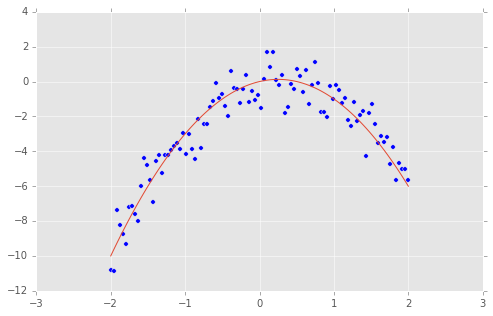

In [3]:
# plot points
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(x,y_noisy)           
ax.plot(x,y)                    

Relationship between $x$ and $y$ is nonlinear.

### (c)

In [4]:
LR = LinearRegression()

In [5]:
x = x.reshape((100,1))
for k in range(4):
    poly = PolynomialFeatures(degree=k+1)
    X = poly.fit_transform(x)
    MSE = -1.0*cross_val_score(LR,X,y_noisy,cv=99,scoring='mean_squared_error')
    print('degree = %d  average MSE = %0.2f' % (k+1,MSE.mean()))

degree = 1  average MSE = 5.82
degree = 2  average MSE = 0.79
degree = 3  average MSE = 0.81
degree = 4  average MSE = 0.83


Note that the MSE returned by `cross_val_score` is negative by design to simplify the API.

### (d) 
Same as (c). There is no variation in the way leave-one-out cross-validation splits the data.

### (e)

The quadratic model (degree = 2) had lowest MSE as expected because the model used to generate the data is a quadratic polynomial.